<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1c : Opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

**1.** S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 

response = request.urlopen(url2)
html2 = response.read().decode('utf-8')

print(f"Length of the text : {len(html2)} characters")

Length of the text : 1034796 characters


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le code source de la page est stocké dans `html2`, on extrait le texte dans `raw2`.

In [3]:
from bs4 import BeautifulSoup

In [4]:
raw2 = BeautifulSoup(html2).get_text()

In [5]:
import re

raw2 = re.sub(r'\[(?:\d+|\w)\]', '', raw2) # remove inline references

**2.** Veuillez réutiliser la méthode du _notebook_ 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse (il ne parle pas de la Suisse).  Quelle est la longueur du résultat ?  Veuillez afficher ses 100 premiers et 100 derniers caractères.

In [6]:
# The method isn't the same as in 1b because we thought it was better in this case.
start2 = raw2.find("Switzerland, officially the Swiss Confederation")

LAST_SENTENCE = "Merlot is the main variety produced in Ticino." # We need to include this sentence in the final text.
end2 = raw2.rfind(LAST_SENTENCE)

html2 = raw2[start2:end2 + len(LAST_SENTENCE)]

print(f"Text length : {len(html2)}")

Text length : 88949


In [7]:
nbr_char = 100
print(f"First {nbr_char} characters : {html2[:nbr_char]}")
print(f"Last {nbr_char} characters : {html2[-nbr_char:]}")

First 100 characters : Switzerland, officially the Swiss Confederation, is a landlocked country located in west-central Eur
Last 100 characters :  Chasselas (called Fendant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.


**3.** Veuillez effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Veuillez écrire le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [8]:
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')

sentences = nltk.sent_tokenize(html2)
for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    fd.write((" ".join(tokens)) + '\n')

fd.close()

> **Appréciation de la qualité**
>
> Les données provenant d'un document structuré comme cette page Wikipédia ne sont pas toujours ordonnés dans un sens logique et correspondant à ce à quoi l'on pourrait s'attendre en regardant le visuel de la page. Des erreurs de segmentation sont présentes, notamment les phrases qui font parties de tableaux, de listes, ou autres, contentant des carcatères spéciaux ou n'étant pas de réelles phrases.
>
> De base, les données contiennent également des références vers les citations en bas de page, qui gènent la segmentation. Nous les avons retirées lors du parsing de la page, mais ce traitement n'est pas nécessairement complet.

**4.** Veuillez maintenant effectuer la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [9]:
words2 = nltk.word_tokenize(html2)

print(f"La page web contient {len(words2)} tokens.")

La page web contient 16063 tokens.


**5.** Veuillez créer un objet de type `nltk.Text` à partir de la liste de *tokens* `words2`.
* Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant cet objet en un `set`.  
* Combien de mots différents y a-t-il dans le vocabulaire, incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [10]:
nltk_text = nltk.Text(words2)
voc = set(words2)

print(f"Nombre de mots différents (types) : {len(voc)}")
print(f"Les 20 types les plus longs : {sorted(voc, key=len, reverse=True)[:20]}")

Nombre de mots différents (types) : 3930
Les 20 types les plus longs : ['Donau-Iller-Rhine-Limes', '65,000-kilometre-long', 'machines/electronics', 'Switzerland–European', 'policies—contributes', 'non-German-speaking', '57.1-kilometre-long', 'instruments/watches', 'commander-in-chief', 'near-Mediterranean', 'autobahn/autoroute', 'multi-disciplinary', 'Non-Proliferation', 'Weiterentwicklung', 'Gallen-Altenrhein', 'pre-revolutionary', 'Telecommunication', 'pastures/grazing', 'authoritarianism', 'Sonderbundskrieg']


> La plupart des mots longs sont des mots composés, des mots allemands ou des mots comportant des traductions (autobahn/autoroute). Les mots sont donc très spécifiques et possèdent des occurrences relativement faibles, sachant que la page traitée est écrite en anglais.

**6.** Veuillez construire un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [11]:
nltk_text2 = [words.lower() for words in nltk_text if words.isalpha()]
fdist = nltk.FreqDist(nltk_text2)

print("Mots les plus fréquents : ")
fdist.most_common(30)

Mots les plus fréquents : 


[('the', 1152),
 ('of', 555),
 ('in', 463),
 ('and', 458),
 ('to', 232),
 ('switzerland', 224),
 ('swiss', 182),
 ('a', 176),
 ('is', 151),
 ('as', 102),
 ('federal', 94),
 ('by', 92),
 ('are', 87),
 ('for', 87),
 ('was', 85),
 ('with', 78),
 ('from', 70),
 ('it', 61),
 ('world', 52),
 ('at', 49),
 ('has', 47),
 ('on', 46),
 ('most', 44),
 ('its', 44),
 ('an', 41),
 ('one', 39),
 ('population', 39),
 ('cantons', 38),
 ('main', 38),
 ('other', 38)]

**7.** Veuillez afficher le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

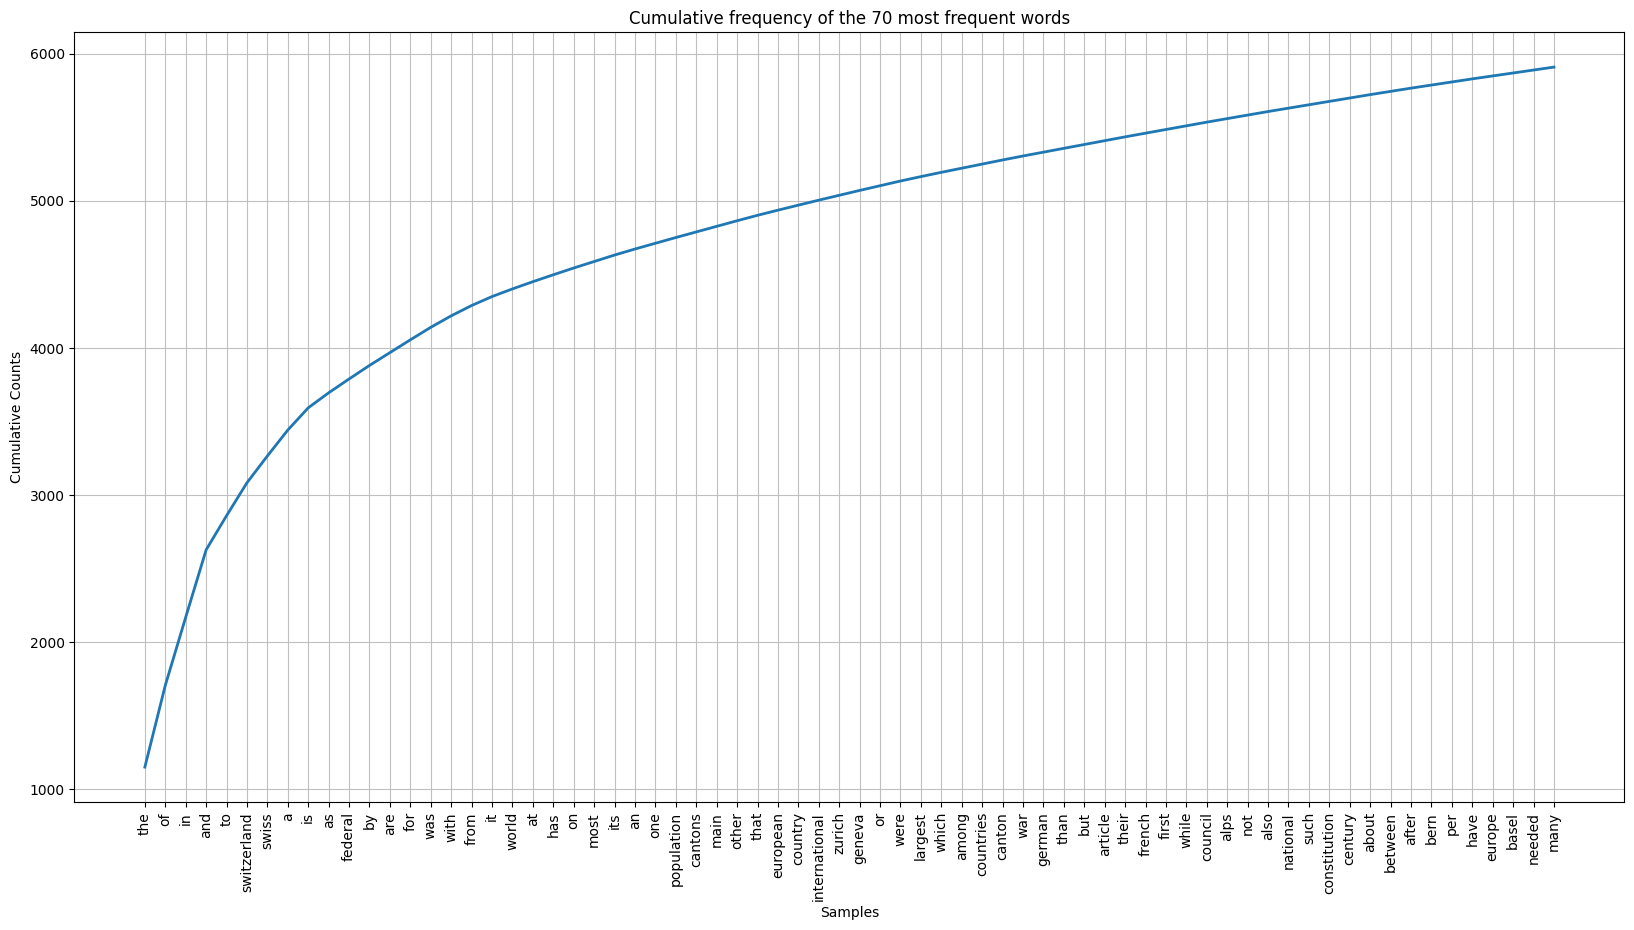

In [12]:
matplotlib.pyplot.figure(figsize=(20, 10))
fdist.plot(70, cumulative=True, title="Cumulative frequency of the 70 most frequent words")
matplotlib.pyplot.show()

**8.** Veuillez construire une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

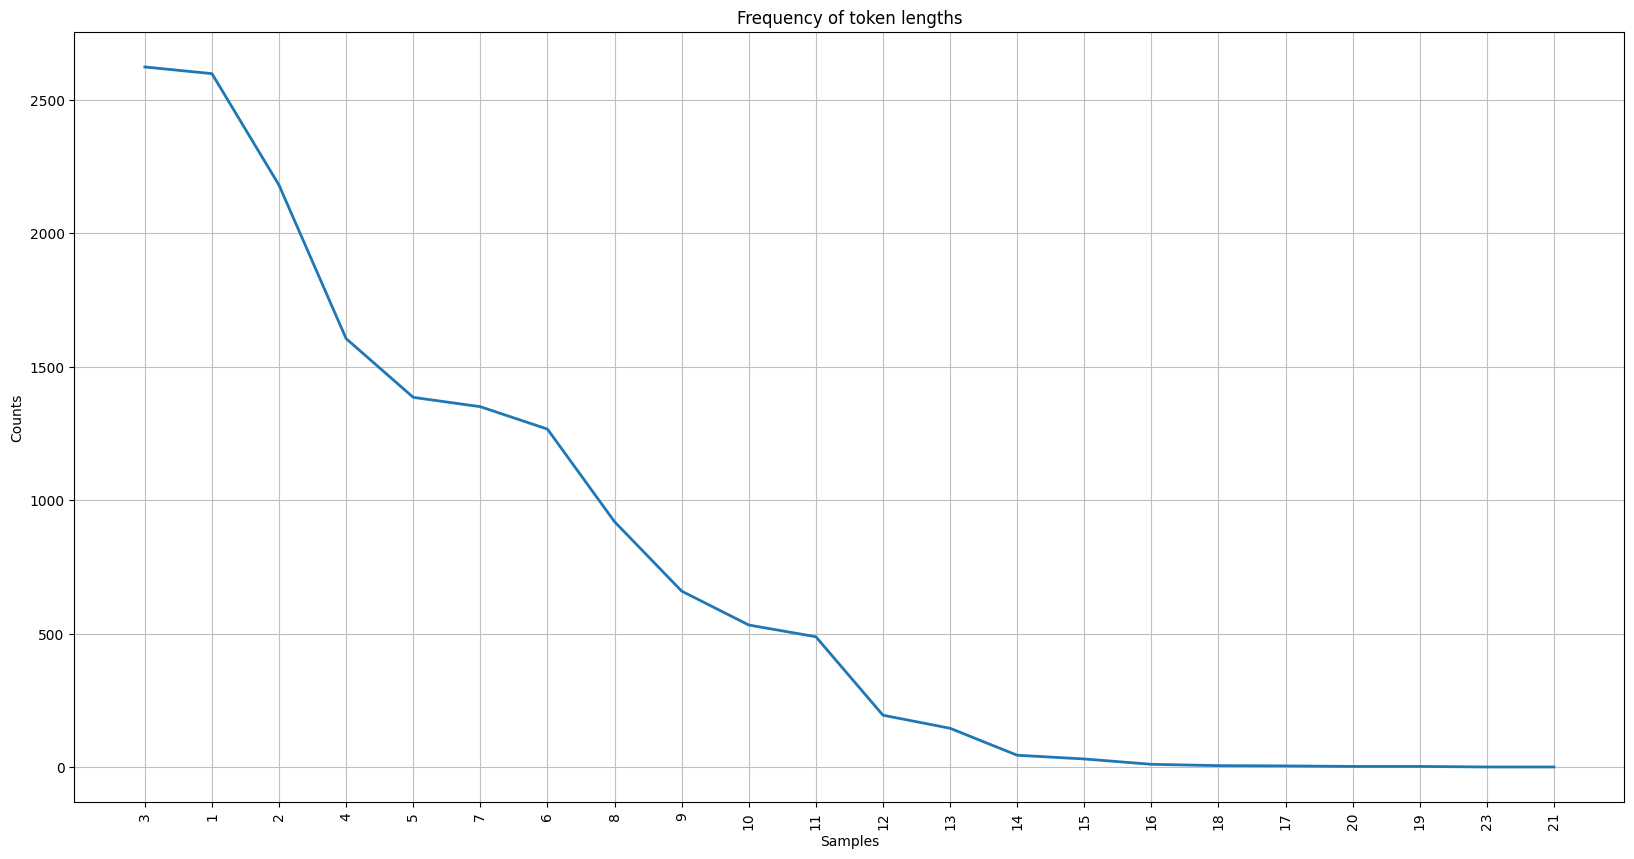

In [13]:
token_lengths = [len(token) for token in nltk_text]
fdist_length = nltk.FreqDist(token_lengths)

matplotlib.pyplot.figure(figsize=(20, 10))
fdist_length.plot(title="Frequency of token lengths")
matplotlib.pyplot.show()

> Vu que nous utilisons tous les tokens dans ce graphique, nous pouvons noter une forte hausse des tokens de longueur 1, qui sont en grande partie les tokens de ponctuation et de démarquation. Les tokens de taille 3 sont en premier juste avant les tokens de taille 1, suivis des tokens de taille 2, ceux-ci correspondent aux mots de préposition ou de jointure qu'on attend à voir en plus grande partie (the, and, at, up, etc.). Contrairement à l'exemple du livre qui représente un ensemble très large on peut remarquer une certaine corrélation entre notre ensemble de données et la thématique, en effet la distribution des mots de taille 5 et 7 plus élevée peut etre corrélée à la thématique de l'article choisi (mots comme swiss, federal, cantons, etc. qui seront naturellement plus utilisés que d'autres).

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ sous le nom `TAL_labo1c_NOM1_NOM2.ipynb`.  Ajoutez-le dans une archive _zip_ avec le _notebook_ 1b, et soumettez l'archive individuellement sur Cyberlearn. 